In [1]:
import json
import os
import numpy as np
import pandas as pd
from utils import load_df_with_keys, load_vecs
from sklearn.cluster import HDBSCAN, DBSCAN
from sklearn.metrics.pairwise import cosine_similarity

KEEP_KEYS = ["keys", "country", "result_id", "title_en","snippet_en"]
KEYS_FOR_RES = ["result_id", "country",'for_query','for_query_en', "title_en", "snippet_en","doc_en","rank","links",'discordance']

Loading in and cleaning test data

In [4]:
test_df = load_df_with_keys("data/keywords_df2.csv")
np_embs, keyword_lines = load_vecs(vecs_file='data/keyword_vecs.np.npy',lines_file='data/keyword_lines.json')


0 <class 'str'>


In [5]:
test_df['doc_en'] = test_df['doc_en'].apply(lambda x: x.replace('\t','').replace('\n',''))
# test_df = test_df.rename(columns={'discordance':'annotated_discordance'})#['annotated_discordance'] = test_df['discordance']
# test_df = test_df.dropna(subset='annotated_discordance')
test_df[KEYS_FOR_RES]

,result_id,country,for_query,for_query_en,title_en,snippet_en,doc_en,rank,links,discordance
0,1,ru,atomic heart,atomic heart,Atomic Heart on Steam,NaN,Welcome to SteamLoginStoreHomeDiscovery QueueW...,2.0,https://store.steampowered.com/app/668580/Atom...,1.0
1,2,ru,atomic heart,atomic heart,Atomic Heart | Exclusively on VK Play,NaN,"Atomic Heart | Exclusively at VK Playige, it h...",3.0,https://atomicheart.vkplay.ru/,1.0
2,3,ru,atomic heart,atomic heart,Atomic Heart,NaN,Wikipedia the free encyclopediaJump to content...,4.0,https://en.wikipedia.org/wiki/Atomic_Heart,2.0
3,4,ru,atomic heart,atomic heart,Atomic Heart,Atomic Heart (from English - “Atomic Heart”) -...,Wikipedia is a free encyclopedias of the Wikip...,5.0,https://ru.wikipedia.org/wiki/Atomic_Heart,2.0
4,5,ru,atomic heart,atomic heart,Atomic Heart,NaN,VK.com | VKYour browser is out of dateThis may...,6.0,https://vk.com/atomicheart_game,3.0
...,...,...,...,...,...,...,...,...,...,...
843,1032,ru,яндекс,Yandex,Yandex - news and information about the company,Yandex and Sberbank announced the section of a...,Vedomosti is a leading business publication of...,15.0,https://www.vedomosti.ru/companies/yandex-n-v,1.0
844,1033,ru,яндекс,Yandex,"Yandex, Moscow - How do we do Yandex / Article...",November 1. 2023. -,All articles in a row / Habr Habr β ...,16.0,https://habr.com/ru/companies/yandex/articles/,1.0
845,1034,ru,яндекс,Yandex,"Yandex introduced the smart column ""MIDI station""",3 days ago -,All the most interesting of the world of the I...,17.0,https://3dnews.ru/1095711/yandeks-anonsiroval-...,3.0
846,1035,ru,яндекс,Yandex,Buy Yandex Promotions (Yndx),"At 10.11.2023, the cost of one share of Yandex...",Tinkoff - credit and debit cards loans for bus...,18.0,https://www.tinkoff.ru/invest/stocks/YNDX/,4.0


In [97]:

query = test_df.sample()['for_query_en'].iloc[0]
queries_df = test_df[test_df['for_query_en'] == query]
word_dict = keyword_lines
embeddings_np = np_embs
method="dbscan"
# def get_clusters(queries_df, word_dict, embeddings_np, , **dbscan_args):
# '''Returns df with columns corresponding to cluster id keys(keywords),country, docid, title'''
# get keyword and keyword -> doc mapping (implicitly by order) x
keywords_df = queries_df[KEEP_KEYS].explode("keys")
keywords = set(keywords_df["keys"].to_list())
# cluster based off of https://arxiv.org/pdf/2008.09470.pdf
# default params:
# metric = lambda x, y: np.inner(x,y)/(np.linalg.norm(x)*np.linalg.norm(y)) 
clusterer = DBSCAN(eps=0.5,min_samples=3)

X = np.concatenate( [embeddings_np[word_dict[word] : word_dict[word] + 1, :] for word in keywords],
axis=0)

clusters = clusterer.fit_predict(X)
# keywords_df["cluster_id"] = clusters
# return keywords_df, clusters


In [98]:
list(zip(keywords, clusters))

[('hypsophila monochrome', -1),
 (' Flowers Valley', -1),
 ('advantages', -1),
 ('pick-up', -1),
 ('reproduction', -1),
 ('minsk', -1),
 ('uah branches', -1),
 ('free note', -1),
 ('bloomflowers', -1),
 ('990 ₽', -1),
 (' Magic Flower', -1),
 (' Flower', -1),
 ('gypsophiles', -1),
 ('mugraine', -1),
 ('gosystem taxonomy', -1),
 ('disadvantages', -1),
 ('Gypsophila', -1),
 ('ttsvetovik', -1),
 ('service records', -1),
 (' Severodvinsk', -1),
 ('color gypsophila', -1),
 ('telekom malaysia', -1),
 (' Moscow', -1),
 ('plaster compositions', -1),
 ('mobile', -1),
 ('delivery service', -1),
 ('bouquets', -1),
 ('flowers valley', -1),
 ('gedanken-experiments', -1),
 ('mri', -1),
 ('wireless connection', -1),
 ('bluetooth', -1),
 ('maxis communications', -1),
 ('online store', -1),
 ('plants', -1),
 ('wireless', -1),
 ('private exchanges', -1),
 ('landing', -1),
 ('mrochester-order', -1),
 ('internet', -1),
 ('Tsvetovik', -1),
 ('pink gypsophila', -1),
 ('mrok', -1),
 ('mrogate', -1),
 ('resel

In [66]:
# X.reshape(-1,2)[:,0], X.reshape(-1,2)[:,1]
color_df = pd.DataFrame()
axes = [ X[i].reshape(-1,2).sum(axis=0) for i in range(len(X))]
color_df['x'] = [i[0] for i in axes] # X
color_df['y'] = [i[1] for i in axes]# a
color_df['cluster_id'] = clusters
color_df

ValueError: Length of values (223) does not match length of index (85632)

In [80]:
keywords_df[keywords_df['keys']=='avito']

,keys,country,result_id,title_en,snippet_en,cluster_id
94,avito,ru,103,"Avito: real estate, transport, work, services,...","On Avito, you can inexpensively buy or profita...",0
95,avito,ru,104,Ads on the website of Avito,Avito - ads on the Avito website.,0
96,avito,ru,105,"Real estate, transport, work, services, things","On Avito, you can inexpensively buy or profita...",0
97,avito,ru,106,"Avito: apartments, cars, work - Apps on Google...",Avito is millions of ads throughout Russia. Wh...,0
100,avito,ru,109,Avito: Ads on the App Store,"Buy profitably. There are cars, electronics, f...",0
101,avito,ru,110,avito.tech,"We tell. What engineers do in Avito, how they ...",0
102,avito,ru,111,"Avito: apartments, cars, work",There are many announcements for the sale of r...,0
103,avito,ru,112,Avito | Ok.ru,"Avito group. On Avito, you can buy an apartmen...",0
104,avito,ru,113,Avito (@avito) • Instagram Photos and Videos,23 Fevr. 2023. -,0
104,avito,ru,113,Avito (@avito) • Instagram Photos and Videos,23 Fevr. 2023. -,0


In [72]:
len(X)

223

In [34]:
import seaborn as sns

<Axes: xlabel='x', ylabel='y'>

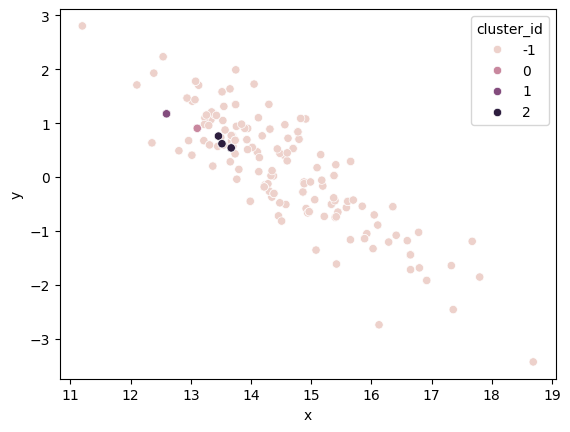

In [64]:
sns.scatterplot(color_df, x='x',y='y',hue='cluster_id')

In [11]:
import matplotlib.pyplot as plt

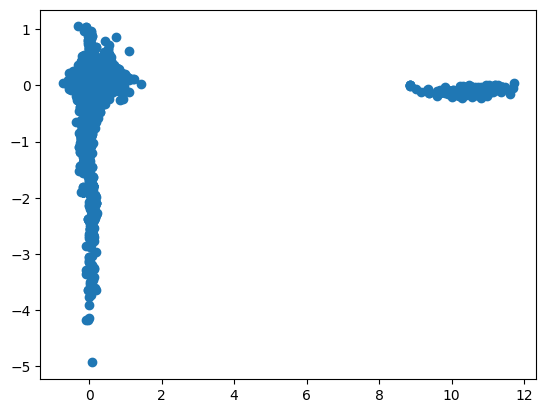

In [65]:
plt.scatter(X.reshape(-1,2)[:,0], X.reshape(-1,2)[:,1])

In [47]:

def get_clusters(queries_df, word_dict, embeddings_np, method="dbscan", **dbscan_args):
    '''Returns df with columns corresponding to cluster id keys(keywords),country, docid, title'''
    # get keyword and keyword -> doc mapping (implicitly by order) x
    keywords_df = queries_df[KEEP_KEYS].explode("keys")
    keywords = keywords_df["keys"].to_list()
    print(word_dict)
    # cluster based off of https://arxiv.org/pdf/2008.09470.pdf
    # default params:
    metric = lambda x, y: np.inner(x,y)/(np.linalg.norm(x)*np.linalg.norm(y)) 

    if method.lower() == "dbscan":
        params = {'min_samples':3,'eps':0.5}
        print(dbscan_args)
        params.update(dbscan_args)
        clusterer = DBSCAN(**params)
    elif method.lower() == "hdbscan":
        params = {
            "min_cluster_size": 3,
            "metric": metric,
            "cluster_selection_method": "leaf",
        }
        params.update(dbscan_args)
        clusterer = HDBSCAN(**params)
    else:
        raise ValueError("method must be in ['dbscan','hdbscan']")
    
    X = np.concatenate(
        [embeddings_np[word_dict[word] : word_dict[word] + 1, :] for word in keywords],
        axis=0,
    )

    clusters = clusterer.fit_predict(X)
    keywords_df["cluster_id"] = clusters
    axes = [ X[i].reshape(-1,2).sum(axis=0) for i in range(len(X))]
    keywords_df['cluster_x'] = [i[0] for i in axes] # X
    keywords_df['cluster_y'] = [i[1] for i in axes]# a
    return keywords_df, clusters


In [ ]:

def get_cluster_scores(clusters_df:pd.DataFrame, agg_mode:str='directional',drop_nas=True) -> pd.DataFrame: 
    if agg_mode.lower() not in ['directional','absolute']: 
        raise ValueError(f"agg_mode must be in {'directional','absolute'}, was {agg_mode}")
    if drop_nas: 
        filt_df = lambda x: x[x['cluster_id'] != -1 ]
    else: 
        filt_df = lambda x:x
    cluster_stats = (
        filt_df(clusters_df).assign(
            cluster_size=1,
            discordance=filt_df(clusters_df)["country"].apply(
                lambda x: 1 if x == "us" else -1 if x == "ru" else 0
            ),
        )
        .groupby("cluster_id")
        .agg({"discordance": "mean", "cluster_size": "sum"})
    )
    cluster_df = clusters_df.join(cluster_stats, on='cluster_id')
    average_func = (lambda x: np.mean(np.abs(x))) if agg_mode == 'absolute' else np.mean
    aggby = {col:'first' for col in KEEP_KEYS }
    aggby['keys'] = list
    aggby['discordance'] = average_func
    aggby['cluster_size'] = 'mean'
    docs = cluster_df.groupby('result_id').agg(aggby)
    docs[['discordance','cluster_size']] = docs[['discordance','cluster_size']].fillna(0)
    docs['abs_discordance'] = np.abs(docs['discordance'].to_numpy())
    return docs.sort_values(['abs_discordance','cluster_size'],ascending=False), cluster_df, cluster_stats



def get_group_discordance(g):
    '''Compute results discordance from calculated cluster discordances'''
    # for all clustered key words (if none are, return 1 as max discordance)
    # compute (all keywords * weights )divided by (keyword num and weights sum)
    # (k1*w1) + (k2*w2 + k3*w2) + (k4*w3) / (k1+k2+k3+k4)(w1+w2+w3)
    nn = g[g['cluster_id']!=-1]
    # if all noise, max discordance
    if len(nn) <= 0:
        return 1
    # else, calculate the average cluster discordance weighted by the proportion
    # of keywords in clusters
    return 1 - (nn['cluster_prop'].mean() * len(nn)/len(g))


def get_doc_discordances(clusters_df:pd.DataFrame) -> pd.DataFrame: 
    cluster_df = clusters_df
    cluster_df['cluster_prop'] = np.abs(cluster_df['discordance'].to_numpy()) 
    cluster_df = cluster_df.reset_index(drop=True)

    gd = cluster_df.groupby('result_id').apply(get_group_discordance)
    cluster_df = cluster_df.groupby('result_id').first().reset_index()
    cluster_df['discordance'] = cluster_df['result_id'].map(dict(gd))
    return cluster_df.sort_values(['discordance'],ascending=False)

def query_ranker(query=None,eps=0.5,min_samples=3):
    '''add in optional eps or min samples to modify dbscan'''
    if query is None:
        # choose query at random 
        query = test_df.sample()['for_query_en'].iloc[0]
    print(f'testing on query:{query}')
    # take only our responses for that query
    query_df = test_df[test_df['for_query_en'] == query]
    # make clusters, get discordance scores, 
    query_clusters, clusters = get_clusters(query_df,keyword_lines, np_embs, eps=eps, min_samples=min_samples)
    docs, cluster_df, cluster_stats = get_cluster_scores(query_clusters)
    df = get_doc_discordances(cluster_df)
    return query_df[KEYS_FOR_RES].merge(df).sort_values(by='discordance',ascending=False)


In [53]:
query_ranker()

testing on query:youtube
{'atomic heart': 0, 'atm heart': 1, 'mobile heart': 2, ' Atomic Heart': 3, 'steam': 4, 'compatibility': 5, 'java': 6, 'mobile': 7, 'wireless connection': 8, ' Steam': 9, 'kd play': 10, ' VK Play': 11, 'cardiac heart': 12, 'computer game': 13, 'role -playing game': 14, 'russian studio': 15, 'atomic heart-shaded image': 16, 'programmability': 17, 'mugfish studio': 18, 'atomic heart game': 19, 'first-person action-RPG': 20, 'mad utopia': 21, 'lorenz map': 22, 'lorezian epic': 23, 'lorezn-': 24, ' Mundfish': 25, 'mugfish': 26, 'official channel': 27, 'content assets': 28, 'metadata': 29, ' mundfish': 30, 'dialogue': 31, 'bioshock': 32, 'wolfenstein': 33, 'plasma': 34, 'radio': 35, 'satellite': 36, 'free-to-use a system': 37, 'chatgpt': 38, 'free-to -use AI system': 39, 'insights': 40, 'automation': 41, 'chat-to chat': 42, 'intelligent tutoring': 43, 'customer service representative': 44, 'russian': 45, 'artificial intelligence': 46, 'spoken dialogues': 47, 'telepho

/var/folders/8k/gl791hln58jfjf42l9wnlv140000gn/T/ipykernel_54668/3588980440.py:24: FutureWarning: The provided callable <function mean at 0x11732ff60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  docs = cluster_df.groupby('result_id').agg(aggby)


,result_id,country,for_query,for_query_en,title_en,snippet_en,doc_en,rank,links,annotated_discordance,keys,cluster_id,discordance,cluster_size,cluster_prop
10,60,ru,youtube,youtube,Gorelkin suggested that mobile operators cance...,1 day ago -,"News in Russia and the world - Taspom, you use...",13.0,https://tass.ru/ekonomika/19255577,5.0,mobile operators,-1,1.000000,NaN,NaN
8,58,ru,youtube,youtube,A woman who led a burst on the border ...,3 days ago -,Auto -Grodno - Cars Grodno News Services Buy A...,11.0,https://autogrodno.by/news/30590-utrom-prosnul...,5.0,women,-1,1.000000,NaN,NaN
3,51,ru,youtube,youtube,What is YouTube mix - station,YouTube mix is ​​a playlist with an unlimited ...,Google Help Skip to main content Google He...,4.0,https://support.google.com/youtube/answer/9011...,1.0,YouTube mix,-1,1.000000,NaN,NaN
12,62,ru,youtube,youtube,International Catalogue of Scientific Literatu...,NaN,Google �����������������������PlayYouTube�����...,15.0,https://books.google.ru/books?id=VyIZAAAAYAAJ&...,2.0,international Catalogue of scientific literature,-1,1.000000,NaN,NaN
14,65,ru,youtube,youtube,The Chemical Trade Journal and Chemical Engineer,NaN,Google �����������������������PlayYouTube�����...,18.0,https://books.google.ru/books?id=Mj86AQAAMAAJ&...,0.0,chemical trade journal,-1,1.000000,NaN,NaN
30,83,us,youtube,youtube,"Montezuma County P&Z Meeting November 9, 2023",1 day ago -,Montezuma County < Skip to content Board of Co...,28.0,https://montezumacounty.org/youtube-montezuma-...,0.0,montezuma county p&z meeting,-1,1.000000,NaN,NaN
11,61,ru,youtube,youtube,The New International Encyclopaedia,NaN,Google �����������������������PlayYouTube�����...,14.0,https://books.google.ru/books?id=9NUXAQAAIAAJ&...,2.0,international encyclopaedia,-1,1.000000,NaN,NaN
1,49,ru,youtube,youtube,YouTube,"YouTube (MFA: [ˈjuːt (j) uːb], “yutyub”, “yutu...",Wikipedia is a free encyclopedias of the Wikip...,2.0,https://ru.wikipedia.org/wiki/YouTube,0.0,video hosting,-1,0.976190,3.0,0.333333
17,68,us,youtube,youtube,"YouTube: Watch, Listen, Stream 12+ - App Store",Get the official YouTube app on iPhones and iP...,App Store - AppleAppleStoreMaciPadiPhoneWatchV...,4.0,https://apps.apple.com/us/app/youtube-watch-li...,0.0,video,5,0.960000,4.0,0.000000
6,55,ru,youtube,youtube,YouTubinaril. YouTube for business. How to sel...,NaN,Google �����������������������PlayYouTube�����...,8.0,https://books.google.ru/books?id=YnmDDwAAQBAJ&...,0.0,youtubinaril,-1,0.960000,25.0,0.280000


In [33]:
from sklearn.metrics import ndcg_score, average_precision_score
from scipy import stats


In [195]:
base_rec = []
stat_rec = []
queries_ann = set(test_df['for_query_en'])
disc = pd.DataFrame()
for q in queries_ann:
    results = query_ranker(q)
    disc = pd.concat([disc, results])
    results = list(zip(results['result_id'],results['discordance']*5))
    print(results)

    truth = test_df[test_df['for_query_en']==q].reset_index(drop=True)#['annotated_discordance'].sort_values(ascending=False).to_numpy() # when 3 or above
    truth_scores = truth.set_index('result_id')['annotated_discordance'].to_dict()
    # organize by result id
    mtscores = []
    mrscores = []
    nrscores = []
    for rid,score in results:
        mrscores.append([score])#(1 if int(score) > 2 else 0)
        mtscores.append(truth_scores[rid])#(1 if truth_scores[rid] > 2 else 0)

    mp = average_precision_score(np.array(mtscores), np.array(mrscores))
    resscores = np.array([x[1] for x in results])
    ng = ndcg_score(np.array(mtscores)[:,None].T, resscores[:,None].T,k=10)
    base_rec.append([q, 'map',mp])
    base_rec.append([q, 'ndcg',ng])


    stat_rec.append([q,stats.ks_2samp(mtscores, [b[1] for b in results])[1]])
statdf=  pd.DataFrame().from_records(stat_rec, columns=['query','value'])
basedf = pd.DataFrame().from_records(base_rec, columns=['query','score','value'])

testing on query:in contact with
[(231, 5.0), (233, 5.0), (228, 4.857142857142857), (237, 4.857142857142857), (248, 4.791666666666667), (242, 4.770833333333334), (218, 4.696969696969697), (247, 4.618055555555555), (238, 4.618055555555555), (227, 4.570887445887446), (243, 4.447619047619048), (224, 4.427083333333333), (239, 4.427083333333333), (220, 4.375), (223, 4.366071428571429), (235, 4.270833333333334), (230, 4.2546768707483), (221, 4.23992673992674), (232, 4.236111111111111), (234, 4.208333333333333), (226, 4.118386243386244), (241, 4.021645021645021), (219, 3.9166666666666665), (240, 3.8452380952380953), (236, 3.369708994708995), (246, 3.369708994708995), (245, 2.9513888888888893)]
testing on query:Production calendar 2023


/var/folders/8k/gl791hln58jfjf42l9wnlv140000gn/T/ipykernel_22209/1421296698.py:24: FutureWarning: The provided callable <function mean at 0x11057ae80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  queries = cluster_df.groupby('result_id').agg(aggby)
/var/folders/8k/gl791hln58jfjf42l9wnlv140000gn/T/ipykernel_22209/1421296698.py:24: FutureWarning: The provided callable <function mean at 0x11057ae80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  queries = cluster_df.groupby('result_id').agg(aggby)


[(799, 5.0), (792, 4.666666666666667), (790, 4.666666666666667), (795, 4.571428571428571), (784, 4.5), (783, 4.4), (803, 4.25), (796, 4.25), (788, 4.083333333333333), (805, 3.9000000000000004), (804, 3.9000000000000004), (800, 3.625), (801, 3.1666666666666665), (793, 1.125), (786, 1.125), (789, 1.125)]
testing on query:Program Guide
[(776, 5.0), (781, 5.0), (767, 5.0), (777, 4.888888888888888), (757, 4.861111111111111), (779, 4.722222222222222), (762, 4.603174603174604), (765, 4.553571428571429), (774, 4.5), (772, 4.487179487179487), (768, 4.417989417989418), (780, 4.387755102040816), (758, 4.2592592592592595), (761, 4.251700680272109), (763, 4.166666666666667), (766, 4.166666666666667), (773, 4.166666666666667), (771, 4.107142857142857), (760, 3.8095238095238093), (759, 3.333333333333334)]
testing on query:Weather tomorrow
[(755, 5.0), (754, 5.0), (748, 5.0), (756, 5.0), (753, 5.0), (752, 4.375), (747, 4.166666666666667), (744, 4.166666666666667), (743, 4.166666666666667), (745, 4.062

/var/folders/8k/gl791hln58jfjf42l9wnlv140000gn/T/ipykernel_22209/1421296698.py:24: FutureWarning: The provided callable <function mean at 0x11057ae80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  queries = cluster_df.groupby('result_id').agg(aggby)
/var/folders/8k/gl791hln58jfjf42l9wnlv140000gn/T/ipykernel_22209/1421296698.py:24: FutureWarning: The provided callable <function mean at 0x11057ae80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  queries = cluster_df.groupby('result_id').agg(aggby)
/var/folders/8k/gl791hln58jfjf42l9wnlv140000gn/T/ipykernel_22209/1421296698.py:24: FutureWarning: The provided callable <function mean at 0x11057ae80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable w

[(527, 4.821428571428571), (547, 4.821428571428571), (535, 4.666666666666667), (532, 4.642857142857143), (540, 4.4940476190476195), (538, 4.2857142857142865), (530, 4.25), (537, 4.222222222222222), (534, 4.2), (528, 4.177489177489178), (520, 4.095238095238095), (529, 4.0), (531, 3.75), (525, 3.75), (546, 3.4940476190476186), (539, 3.325396825396826), (524, 3.257142857142857), (526, 2.8690476190476186), (543, 2.8), (536, 2.658730158730159), (523, 2.278911564625851), (533, 1.4285714285714284)]
testing on query:classmates
[(556, 5.0), (563, 5.0), (569, 5.0), (574, 5.0), (554, 4.791666666666667), (561, 4.62962962962963), (565, 4.5), (560, 4.479166666666667), (559, 4.267857142857143), (567, 4.21875), (548, 4.196969696969697), (564, 4.0875), (573, 4.041666666666667), (572, 4.027777777777778), (550, 3.880208333333334), (570, 3.854166666666667), (568, 3.8333333333333335), (566, 3.75), (558, 3.697916666666666), (549, 3.671875), (562, 3.4375), (555, 3.375), (551, 3.3720238095238098), (552, 2.312

/var/folders/8k/gl791hln58jfjf42l9wnlv140000gn/T/ipykernel_22209/1421296698.py:24: FutureWarning: The provided callable <function mean at 0x11057ae80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  queries = cluster_df.groupby('result_id').agg(aggby)
/var/folders/8k/gl791hln58jfjf42l9wnlv140000gn/T/ipykernel_22209/1421296698.py:24: FutureWarning: The provided callable <function mean at 0x11057ae80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  queries = cluster_df.groupby('result_id').agg(aggby)
/var/folders/8k/gl791hln58jfjf42l9wnlv140000gn/T/ipykernel_22209/1421296698.py:24: FutureWarning: The provided callable <function mean at 0x11057ae80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable w

[(877, 4.715909090909091), (883, 4.6875), (887, 4.423076923076923), (875, 2.840909090909091), (876, 2.840909090909091), (880, 2.840909090909091), (878, 2.840909090909091), (882, 2.840909090909091), (884, 2.840909090909091), (889, 2.840909090909091), (895, 2.840909090909091), (897, 2.840909090909091), (900, 2.840909090909091)]
testing on query:Walberis
[(172, 5.0), (175, 5.0), (159, 5.0), (173, 5.0), (164, 4.909090909090909), (178, 4.9), (179, 4.733333333333333), (176, 4.583333333333333), (171, 4.464285714285714), (157, 4.464285714285714), (160, 4.40625), (165, 4.375), (158, 4.097222222222222), (161, 4.083333333333333), (170, 3.541666666666666), (155, 3.055555555555556), (163, 3.0), (169, 2.3214285714285716), (156, 1.4285714285714284)]
testing on query:atomic heart
[(4, 4.722222222222222), (11, 4.583333333333333), (1, 4.2407407407407405), (6, 4.083333333333333), (2, 4.027777777777778), (3, 3.7083333333333335), (5, 3.7083333333333335), (9, 3.7083333333333335), (10, 3.7083333333333335), (

/var/folders/8k/gl791hln58jfjf42l9wnlv140000gn/T/ipykernel_22209/1421296698.py:24: FutureWarning: The provided callable <function mean at 0x11057ae80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  queries = cluster_df.groupby('result_id').agg(aggby)
/var/folders/8k/gl791hln58jfjf42l9wnlv140000gn/T/ipykernel_22209/1421296698.py:24: FutureWarning: The provided callable <function mean at 0x11057ae80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  queries = cluster_df.groupby('result_id').agg(aggby)
/var/folders/8k/gl791hln58jfjf42l9wnlv140000gn/T/ipykernel_22209/1421296698.py:24: FutureWarning: The provided callable <function mean at 0x11057ae80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable w

testing on query:chatgpt
[(31, 5.0), (27, 5.0), (43, 5.0), (38, 4.940476190476191), (32, 4.940476190476191), (21, 4.940476190476191), (35, 4.940476190476191), (33, 4.930555555555555), (37, 4.916666666666666), (18, 4.895833333333333), (36, 4.556878306878307), (12, 4.501488095238095), (22, 4.333333333333334), (40, 4.322916666666667), (30, 4.293154761904762), (13, 4.226190476190476), (15, 4.226190476190476), (23, 4.097222222222222), (19, 3.958333333333334), (24, 3.958333333333334), (28, 3.9285714285714284), (20, 3.9166666666666665), (26, 3.715986394557823), (14, 3.6011904761904763), (47, 3.541666666666667), (34, 3.541666666666666), (42, 3.5119047619047623), (39, 3.5119047619047623), (16, 3.333333333333334), (41, 3.333333333333334), (45, 3.2638888888888893), (17, 3.2638888888888893), (25, 3.2514880952380953), (46, 2.7777777777777777)]
testing on query:Avatar 2
[(92, 5.0), (98, 5.0), (95, 4.722222222222222), (90, 4.703703703703704), (91, 4.6923076923076925), (93, 4.48051948051948), (101, 4.

/var/folders/8k/gl791hln58jfjf42l9wnlv140000gn/T/ipykernel_22209/1421296698.py:24: FutureWarning: The provided callable <function mean at 0x11057ae80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  queries = cluster_df.groupby('result_id').agg(aggby)
/var/folders/8k/gl791hln58jfjf42l9wnlv140000gn/T/ipykernel_22209/1421296698.py:24: FutureWarning: The provided callable <function mean at 0x11057ae80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  queries = cluster_df.groupby('result_id').agg(aggby)
/var/folders/8k/gl791hln58jfjf42l9wnlv140000gn/T/ipykernel_22209/1421296698.py:24: FutureWarning: The provided callable <function mean at 0x11057ae80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable w

[(844, 5.0), (840, 5.0), (839, 5.0), (834, 4.444444444444445), (847, 4.2857142857142865), (825, 4.2857142857142865), (828, 4.090909090909091), (826, 4.090909090909091), (831, 4.0), (832, 3.6363636363636367), (829, 3.333333333333334), (824, 3.0), (843, 2.8571428571428568), (836, 2.5), (841, 2.5), (838, 2.5), (827, 1.666666666666667), (848, 1.25)]
testing on query:Gypsophyla
[(276, 5.0), (281, 5.0), (287, 5.0), (285, 5.0), (284, 5.0), (300, 5.0), (302, 5.0), (306, 5.0), (298, 5.0), (303, 5.0), (304, 4.603174603174603), (295, 4.583333333333333), (299, 4.537037037037037), (301, 4.537037037037037), (293, 4.444444444444445), (280, 4.416666666666666), (297, 4.3580246913580245), (292, 4.305555555555555), (305, 4.166666666666667), (282, 4.038461538461538), (286, 3.867521367521367), (283, 3.8024691358024687), (291, 3.531746031746032), (288, 3.3055555555555554), (289, 3.111111111111111)]
testing on query:Inna Churikova
[(417, 5.0), (410, 4.8809523809523805), (414, 4.7749999999999995), (420, 4.718

/var/folders/8k/gl791hln58jfjf42l9wnlv140000gn/T/ipykernel_22209/1421296698.py:24: FutureWarning: The provided callable <function mean at 0x11057ae80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  queries = cluster_df.groupby('result_id').agg(aggby)
/var/folders/8k/gl791hln58jfjf42l9wnlv140000gn/T/ipykernel_22209/1421296698.py:24: FutureWarning: The provided callable <function mean at 0x11057ae80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  queries = cluster_df.groupby('result_id').agg(aggby)
/var/folders/8k/gl791hln58jfjf42l9wnlv140000gn/T/ipykernel_22209/1421296698.py:24: FutureWarning: The provided callable <function mean at 0x11057ae80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable w

[(128, 5.0), (131, 5.0), (130, 5.0), (125, 4.761904761904762), (129, 4.6938775510204085), (112, 4.657738095238095), (118, 4.642857142857143), (119, 4.62962962962963), (126, 4.583333333333333), (107, 4.545454545454545), (110, 4.5021645021645025), (121, 4.380952380952381), (109, 4.333333333333334), (123, 4.2857142857142865), (113, 4.265873015873016), (108, 4.2592592592592595), (115, 4.115646258503402), (120, 4.0211640211640205), (122, 3.8553113553113554), (104, 3.8095238095238093), (106, 3.6471861471861478), (127, 3.619047619047619), (103, 3.5374149659863945), (105, 3.333333333333334), (117, 3.1746031746031744), (111, 2.5510204081632653)]
testing on query:public services
[(308, 5.0), (324, 5.0), (319, 5.0), (325, 5.0), (329, 5.0), (309, 4.768518518518519), (326, 4.761904761904762), (322, 4.603174603174603), (310, 4.537037037037037), (317, 4.444444444444445), (318, 4.305555555555555), (315, 4.090909090909091), (311, 3.3950617283950617), (327, 3.194444444444444), (307, 2.4444444444444446)]

/var/folders/8k/gl791hln58jfjf42l9wnlv140000gn/T/ipykernel_22209/1421296698.py:24: FutureWarning: The provided callable <function mean at 0x11057ae80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  queries = cluster_df.groupby('result_id').agg(aggby)
/var/folders/8k/gl791hln58jfjf42l9wnlv140000gn/T/ipykernel_22209/1421296698.py:24: FutureWarning: The provided callable <function mean at 0x11057ae80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  queries = cluster_df.groupby('result_id').agg(aggby)
/var/folders/8k/gl791hln58jfjf42l9wnlv140000gn/T/ipykernel_22209/1421296698.py:24: FutureWarning: The provided callable <function mean at 0x11057ae80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable w

[(806, 5.0), (809, 5.0), (813, 5.0), (811, 5.0), (819, 5.0), (820, 5.0), (821, 5.0), (818, 5.0), (816, 4.375), (810, 4.166666666666667), (817, 4.0), (808, 2.5), (815, 2.0), (807, 1.666666666666667), (822, 1.666666666666667), (814, 1.25)]
testing on query:Google
[(336, 5.0), (335, 5.0), (347, 5.0), (341, 5.0), (339, 4.375), (342, 4.375), (338, 4.2857142857142865), (337, 4.0), (334, 4.0), (333, 4.0), (345, 3.5714285714285716), (340, 3.5714285714285716), (343, 3.5), (344, 3.333333333333334), (332, 3.125), (330, 2.8571428571428568), (331, 2.8571428571428568), (346, 2.5)]
testing on query:diary RU
[(373, 5.0), (355, 4.963235294117647), (367, 4.906417112299465), (357, 4.9), (365, 4.856209150326797), (356, 4.8545454545454545), (353, 4.815126050420168), (363, 4.666666666666667), (369, 4.666666666666667), (359, 4.613757899854156), (354, 4.5588235294117645), (366, 4.491800356506238), (372, 4.435333729451377), (360, 4.325133689839572), (348, 4.303030303030303), (364, 4.3), (358, 4.285714285714286

/var/folders/8k/gl791hln58jfjf42l9wnlv140000gn/T/ipykernel_22209/1421296698.py:24: FutureWarning: The provided callable <function mean at 0x11057ae80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  queries = cluster_df.groupby('result_id').agg(aggby)
/var/folders/8k/gl791hln58jfjf42l9wnlv140000gn/T/ipykernel_22209/1421296698.py:24: FutureWarning: The provided callable <function mean at 0x11057ae80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  queries = cluster_df.groupby('result_id').agg(aggby)
/var/folders/8k/gl791hln58jfjf42l9wnlv140000gn/T/ipykernel_22209/1421296698.py:24: FutureWarning: The provided callable <function mean at 0x11057ae80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable w

[(725, 5.0), (726, 5.0), (719, 4.967320261437909), (727, 4.958333333333334), (722, 4.916666666666666), (684, 4.875), (729, 4.852941176470588), (683, 4.838235294117647), (701, 4.815126050420168), (721, 4.805555555555555), (718, 4.784313725490196), (691, 4.621212121212121), (685, 4.560708898944193), (705, 4.538084464555053), (686, 4.431818181818182), (702, 4.423076923076923), (690, 4.423076923076923), (720, 4.3504901960784315), (723, 4.192890442890443), (694, 4.138802374096492), (700, 4.129901960784314), (715, 4.119281045751634), (687, 4.112179487179487), (689, 4.090909090909091), (692, 4.053030303030303), (709, 4.026292335115865), (717, 4.024101307189543), (698, 3.986278872642509), (693, 3.9672364672364675), (703, 3.942550505050505), (699, 3.942307692307692), (706, 3.942307692307692), (707, 3.941176470588235), (695, 3.890224358974359), (714, 3.8747771836007128), (712, 3.8490675990675993), (696, 3.846361971361971), (724, 3.8425925925925926), (697, 3.791208791208791), (728, 3.75), (716, 3

/var/folders/8k/gl791hln58jfjf42l9wnlv140000gn/T/ipykernel_22209/1421296698.py:24: FutureWarning: The provided callable <function mean at 0x11057ae80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  queries = cluster_df.groupby('result_id').agg(aggby)
/var/folders/8k/gl791hln58jfjf42l9wnlv140000gn/T/ipykernel_22209/1421296698.py:24: FutureWarning: The provided callable <function mean at 0x11057ae80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  queries = cluster_df.groupby('result_id').agg(aggby)


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/8k/gl791hln58jfjf42l9wnlv140000gn/T/ipykernel_22209/2554895273.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=30,horizontalalignment='right')


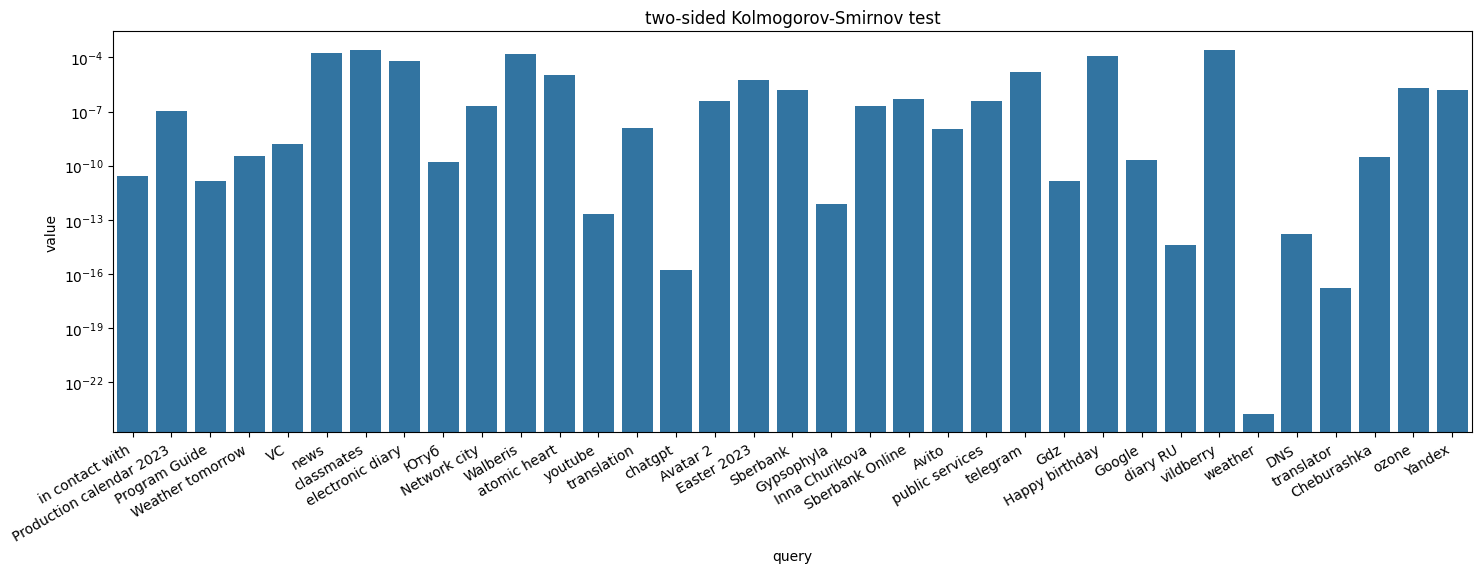

In [196]:
plt.figure(figsize=(15,10))
plt.subplot(211)
chart = sns.barplot(statdf, x='query',y='value')
chart.set(title='two-sided Kolmogorov-Smirnov test',yscale='log')
chart.set_xticklabels(chart.get_xticklabels(), rotation=30,horizontalalignment='right')
plt.tight_layout()
# plt.savefig('figures/ks_test.png')


[Text(0.5, 1.0, 'MAP and NDCG Scores for Discordance Baseline')]

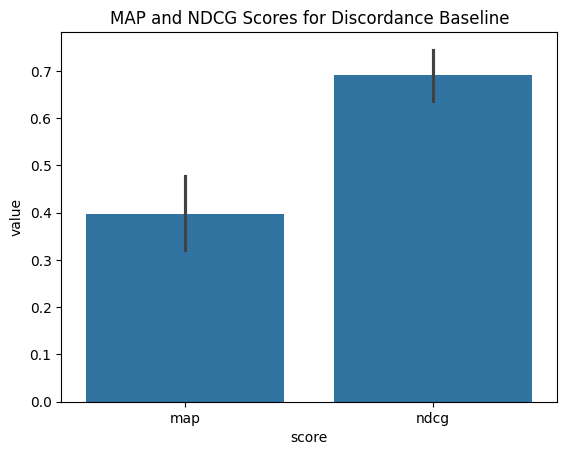

In [197]:
sns.barplot(basedf, x='score',y='value').set(title='MAP and NDCG Scores for Discordance Baseline')


/var/folders/8k/gl791hln58jfjf42l9wnlv140000gn/T/ipykernel_22209/3520679048.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=30,horizontalalignment='right')


[Text(0.5, 1.0, 'MAP and NDCG Scores for Discordance Baseline - Annotated Subset')]

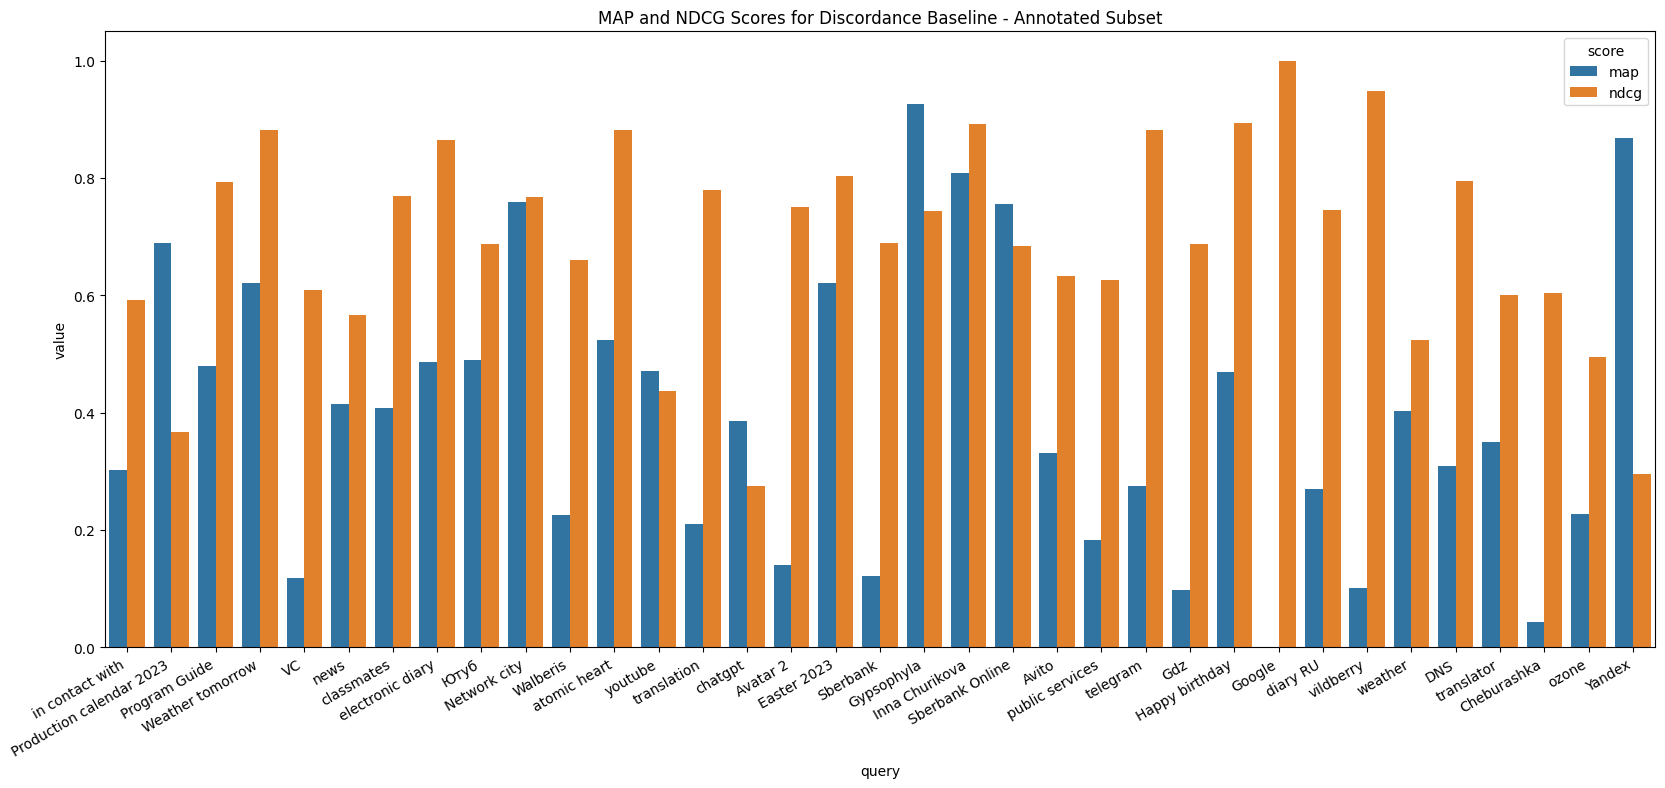

In [198]:
plt.figure(figsize=(20,8))
chart = sns.barplot(basedf, x='query',hue='score', y='value')
chart.set_xticklabels(chart.get_xticklabels(), rotation=30,horizontalalignment='right')
chart.set(title='MAP and NDCG Scores for Discordance Baseline - Annotated Subset',)
# plt.savefig('figures/fine_map_ndcg.png')

[Text(0.5, 1.0, 'Baseline Discordance ECDF'), (0.0, 1.1)]

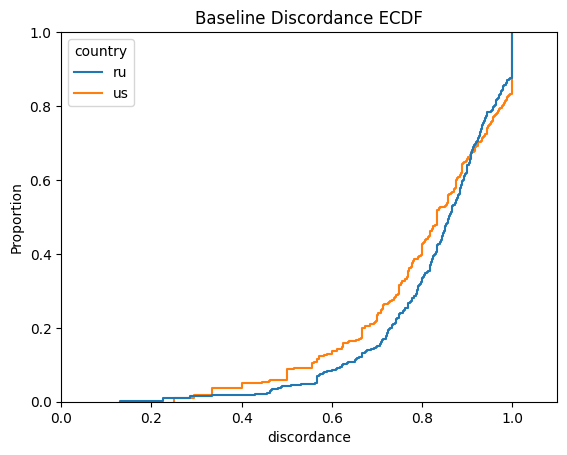

In [204]:
sns.ecdfplot(disc, x='discordance',hue='country').set(title='Baseline Discordance ECDF', xlim=(0,1.1))
